# Data exploration & Regression Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

Utilizo el archivo ``Empresas.xlsx``, que está en formato tabular, para encontrar los valores no-nulos por año y empresa/sector para decidir qué años y empresas/sectores incluir en un primer modelo.

In [2]:
data = pd.read_excel("../data/Empresas.xlsx")
data.head()

,Company,Country,Sector,KPI,Year,value
0,3m,USA,Consumo,Ingresos,2020,32184.00
1,3m,USA,Consumo,Coste de ventas,2020,-16605.00
2,3m,USA,Consumo,Margen bruto,2020,15579.00
3,3m,USA,Consumo,EBITDA,2020,9072.00
4,3m,USA,Consumo,Margen EBITDA / Ventas,2020,28.19


In [3]:
data.shape

(90050, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90050 entries, 0 to 90049
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  90050 non-null  object 
 1   Country  90050 non-null  object 
 2   Sector   90050 non-null  object 
 3   KPI      90050 non-null  object 
 4   Year     90050 non-null  int64  
 5   value    90036 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.1+ MB


In [5]:
data['value'].isnull().sum()

14

In [6]:
data = data.dropna()
data.shape

(90036, 6)

In [7]:
pd.crosstab(data['Sector'], data['Year'], margins=True, margins_name="Total")

Year,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Sector,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agua,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,71,82,82,82,82,82,83,82,82,82,82,82,82,84,84,1254
Alimentación,13,52,53,53,53,56,72,91,99,104,107,115,168,191,193,196,199,206,213,232,244,249,250,249,250,279,293,292,294,293,293,327,337,335,84,6535
Aseguradoras,0,27,27,27,29,29,29,29,31,33,33,43,117,145,154,173,188,194,198,200,200,204,207,207,207,207,207,209,210,210,210,210,210,204,0,4608
Automóviles,0,9,9,9,9,9,9,9,9,10,14,52,62,75,81,81,81,81,83,86,87,86,106,115,119,122,122,122,150,162,197,213,212,166,0,2757
Autopistas,0,0,0,0,0,0,0,0,0,0,0,0,0,23,41,41,41,41,41,41,41,41,41,41,41,41,41,68,79,83,83,83,83,82,0,1117
Bancos,0,7,7,7,34,36,42,45,69,97,97,110,110,123,143,156,161,161,167,173,173,183,183,183,222,268,274,274,274,273,273,273,273,269,0,5140
Construcción,0,0,0,0,21,21,33,33,33,40,43,77,99,121,133,141,155,154,171,186,200,209,209,209,209,209,210,209,209,209,209,209,209,205,0,4375
Consumo,0,140,145,160,163,198,254,326,355,363,372,392,425,447,474,480,483,488,491,492,493,492,492,492,488,485,489,493,495,495,495,503,510,503,215,13788
Distribución,0,0,0,0,0,0,0,0,0,0,17,22,22,22,22,33,39,39,39,40,40,42,42,43,43,43,43,69,83,83,83,83,83,81,40,1196


Utilizo el archivo ``Empresas_wide.xlsx`` para crear el modelo:

In [8]:
data = pd.read_excel("../data/Empresas_wide.xlsx")
data.head()

,Company,Country,Sector,Year,Activos totales,Activos totales / fondos propios,BPA %,BPA extraordinario,BPA ordinario,BPA total,CFE-CFI,CFE-CFI-PID,Cash-flow de explotación,Cash-flow de financiación,Cash-flow de inversión,Cash-flow neto,Cobertura de la morosidad,Comisiones netas,Core Capital,Coste de ventas,Cotización máxima,Cotización mínima,Depósitos de clientes,Deuda neta,Deuda neta / CF EXplotación,Deuda neta / EBITDA,Dividendo extraordinario,Dividendo ordinario,Dividendo total,EBIT,EBIT (Operating profit),EBITDA,EV / EBITDA medio,EV / EBITDA máximo,EV / EBITDA mínimo,Fondos propios,Ingresos,Ingresos totales,Inversión crediticia,Inversión crediticia / depósitos de clientes,Inversión crediticia / fondos propios,Margen EBIT / Ventas,Margen EBITDA / Ventas,Margen bruto,Margen de intereses,Margen neto de explotación,Nº acciones a 31 de Diciembre,Otros ingresos,PER medio,PER máximo,PER mínimo,Pago por dividendos,Pay-out,Precio / Valor contable medio,Precio / Valor contable máximo,Precio / Valor contable mínimo,Primas,RD% media,RD% máxima,RD% mínima,ROA,ROCE,ROE,Ratio combinado,Ratio de eficiencia,Resultado neto ordinario,Resultado neto total,Tasa de morosidad,Tier 1,Valor contable por acción,Variación tipos cambio
0,3m,USA,Consumo,1987,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,20.09,10.83,NaN,0.0,NaN,NaN,NaN,0.465,0.465,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3.20,4.16,2.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3m,USA,Consumo,1988,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,16.24,13.29,NaN,0.0,NaN,NaN,NaN,0.530,0.530,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3.18,3.50,2.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3m,USA,Consumo,1989,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,19.70,14.47,NaN,0.0,NaN,NaN,NaN,0.650,0.650,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3.18,3.66,2.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3m,USA,Consumo,1990,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,21.99,17.72,NaN,0.0,NaN,NaN,NaN,0.730,0.730,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3.31,3.67,2.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3m,USA,Consumo,1991,NaN,NaN,NaN,0.0,1.31,1.31,NaN,712.0,1909.0,-686.0,-1197.0,-36.0,NaN,NaN,NaN,-8058.0,23.46,18.82,NaN,0.0,0.0,0.0,NaN,0.780,0.780,NaN,1959.0,2843.0,NaN,NaN,NaN,NaN,13340.0,NaN,NaN,NaN,NaN,14.69,21.31,5282.0,NaN,NaN,878400000.0,NaN,NaN,NaN,NaN,685.0,59.37,NaN,NaN,NaN,NaN,3.50,3.88,3.11,NaN,NaN,NaN,NaN,NaN,1154.0,NaN,NaN,NaN,NaN,-62.0


### Data exploration

In [9]:
data.shape

(2554, 71)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Company                                       2554 non-null   object 
 1   Country                                       2554 non-null   object 
 2   Sector                                        2554 non-null   object 
 3   Year                                          2554 non-null   int64  
 4   Activos totales                               119 non-null    float64
 5   Activos totales / fondos propios              95 non-null     float64
 6   BPA %                                         18 non-null     float64
 7   BPA extraordinario                            2332 non-null   float64
 8   BPA ordinario                                 2176 non-null   float64
 9   BPA total                                     2154 non-null   f

In [11]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Número de Filas:", df.shape[0])
    print("\nNúmero de Columnas:", df.shape[1])
    print("\nColumnas:\n")
    print(data.columns.tolist())
    print("\nValores nulos:", df.isnull().sum().values.sum())
    print("\nValores únicos:\n")
    print(df.nunique())

In [12]:
dataoveriew(data, 'Overiew of the test dataset')

Overiew of the test dataset:

Número de Filas: 2554

Número de Columnas: 71

Columnas:

['Company', 'Country', 'Sector', 'Year', 'Activos totales', 'Activos totales / fondos propios', 'BPA %', 'BPA extraordinario', 'BPA ordinario', 'BPA total', 'CFE-CFI', 'CFE-CFI-PID', 'Cash-flow de explotación', 'Cash-flow de financiación', 'Cash-flow de inversión', 'Cash-flow neto', 'Cobertura de la morosidad', 'Comisiones netas', 'Core Capital', 'Coste de ventas', 'Cotización máxima', 'Cotización mínima', 'Depósitos de clientes', 'Deuda neta', 'Deuda neta / CF EXplotación', 'Deuda neta / EBITDA', 'Dividendo extraordinario', 'Dividendo ordinario', 'Dividendo total', 'EBIT', 'EBIT (Operating profit)', 'EBITDA', 'EV / EBITDA medio', 'EV / EBITDA máximo', 'EV / EBITDA mínimo', 'Fondos propios', 'Ingresos', 'Ingresos totales', 'Inversión crediticia', 'Inversión crediticia / depósitos de clientes', 'Inversión crediticia / fondos propios', 'Margen EBIT / Ventas', 'Margen EBITDA / Ventas', 'Margen bruto', 

### Primer modelo

Primer modelo para el sector ``Eléctricas`` entre 2012 y 2019, utilizando los ratios: 'BPA ordinario', 'ROA', 'ROCE', 'ROE', 'Valor contable por acción' y cotizaciones:

In [23]:
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
cols = ['Company', 'Country', 'Sector', 'Year', 'BPA ordinario', 'ROA', 'ROCE', 'ROE', 'Valor contable por acción',
        'Cotización máxima', 'Cotización mínima']
sector = ['Eléctricas']

data_electrics = data[data['Sector'].isin(sector) & data['Year'].isin(years)]
data_electrics = data_electrics[cols]
data_electrics['Year'] = data_electrics['Year'].astype('str')
data_electrics.head()

,Company,Country,Sector,Year,BPA ordinario,ROA,ROCE,ROE,Valor contable por acción,Cotización máxima,Cotización mínima
1032,e-on,Zona Euro,Eléctricas,2012,1.15,1.56,6.26,6.26,18.35,19.74,13.61
1033,e-on,Zona Euro,Eléctricas,2013,1.12,1.64,7.55,6.40,17.57,14.92,11.82
1034,e-on,Zona Euro,Eléctricas,2014,-1.63,-2.51,7.76,-12.85,12.72,15.46,12.23
1035,e-on,Zona Euro,Eléctricas,2015,-3.58,-6.16,9.34,-42.60,8.41,14.85,7.08
1036,e-on,Zona Euro,Eléctricas,2016,-4.33,-13.27,-1.49,800.95,-0.54,9.83,6.06


In [24]:
data_electrics.isnull().sum()

Company                      0
Country                      0
Sector                       0
Year                         0
BPA ordinario                0
ROA                          0
ROCE                         0
ROE                          0
Valor contable por acción    0
Cotización máxima            0
Cotización mínima            0
dtype: int64

In [20]:
# data_electrics = data_electrics.fillna(np.mean(data_electrics['Deuda neta / EBITDA']))
# data_electrics.isnull().sum()

In [25]:
data_electrics.groupby(['Country', 'Company'])[['Year']].count()

Year
Country    Company                  
España     endesa                  8
           iberdrola               8
           naturgy-gas-natural     8
           ree                     8
Inglaterra national-grid           8
Zona Euro  e-on                    8
           engie                   8
           rwe                     8

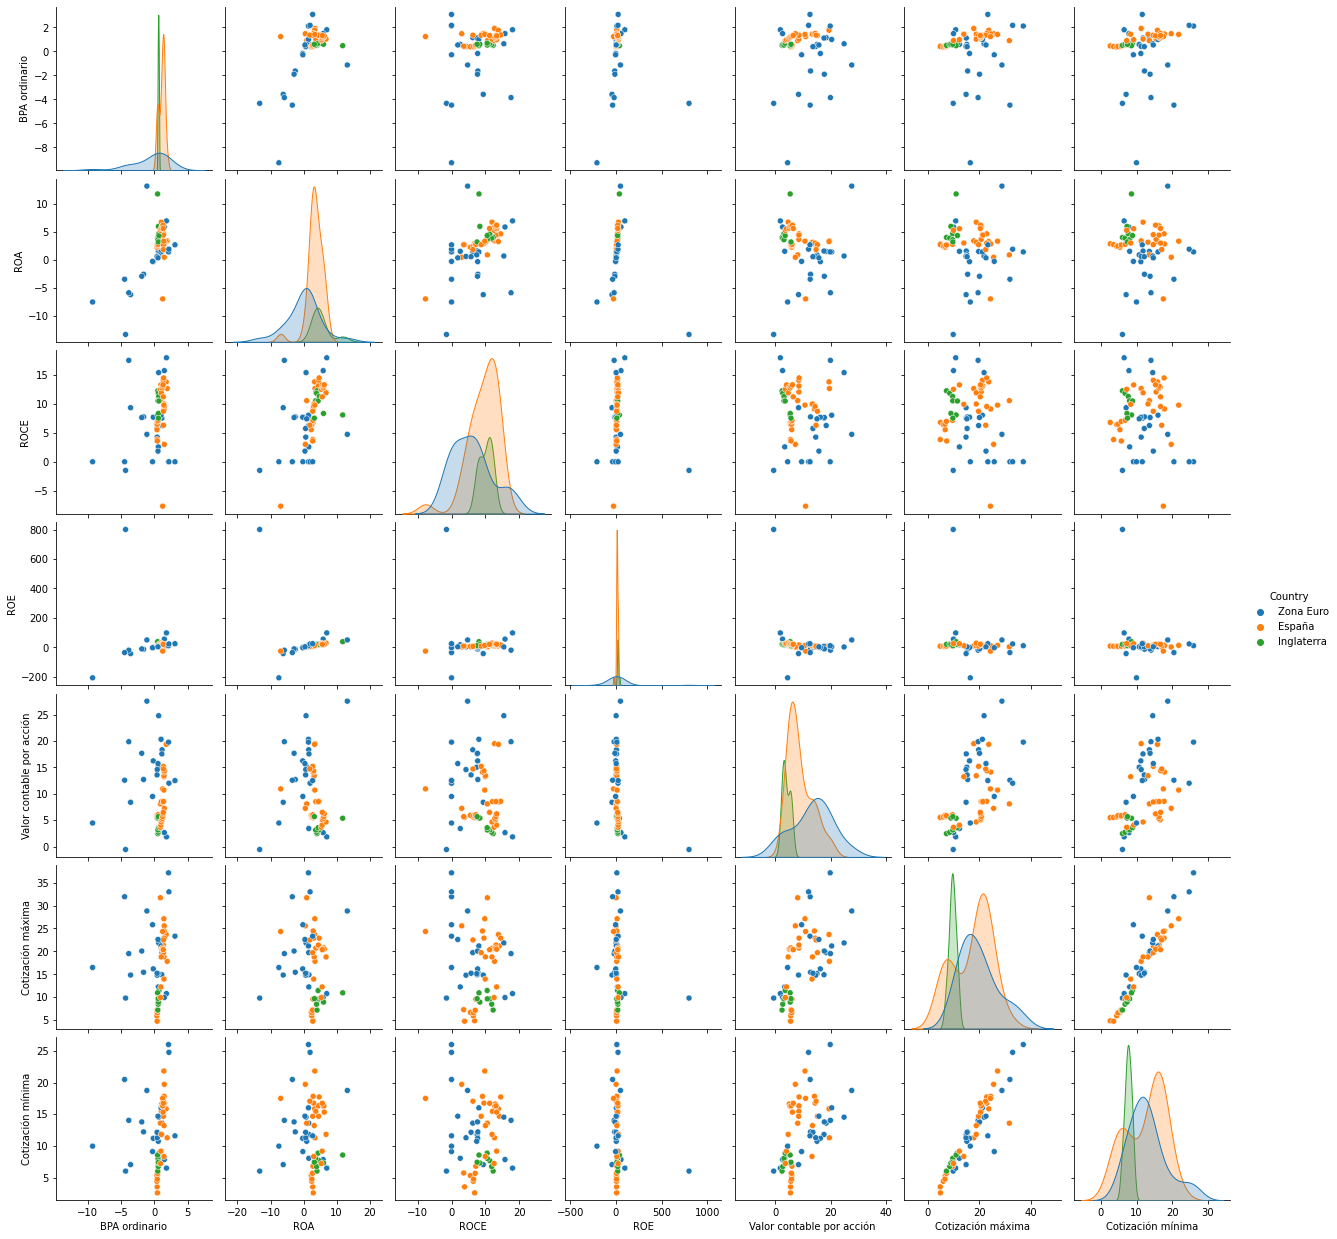

In [26]:
sns.pairplot(data_electrics, hue = 'Country')

In [27]:
corr = data_electrics.corr()
corr

,BPA ordinario,ROA,ROCE,ROE,Valor contable por acción,Cotización máxima,Cotización mínima
BPA ordinario,1.000000,0.623780,0.251971,-0.059731,0.053135,0.088877,0.168465
ROA,0.623780,1.000000,0.482514,-0.246241,-0.088060,-0.076411,0.013568
ROCE,0.251971,0.482514,1.000000,-0.104179,-0.085534,-0.173790,-0.083560
ROE,-0.059731,-0.246241,-0.104179,1.000000,-0.229239,-0.147594,-0.147825
Valor contable por acción,0.053135,-0.088060,-0.085534,-0.229239,1.000000,0.567313,0.536004
Cotización máxima,0.088877,-0.076411,-0.173790,-0.147594,0.567313,1.000000,0.924110
Cotización mínima,0.168465,0.013568,-0.083560,-0.147825,0.536004,0.924110,1.000000


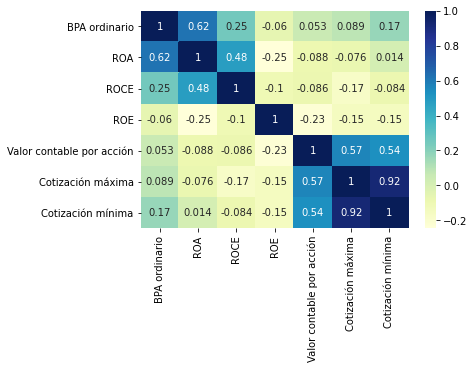

In [28]:
sns.heatmap(corr, cmap="YlGnBu", annot=True)

### Modelo de regresión lineal múltiple

In [29]:
X = data_electrics.iloc[:, :-2].values
y_max = data_electrics.iloc[:, 9].values
y_min = data_electrics.iloc[:, 10].values

In [30]:
X

array([['e-on', 'Zona Euro', 'Eléctricas', '2012', 1.15, 1.56, 6.26,
        6.26, 18.35],
       ['e-on', 'Zona Euro', 'Eléctricas', '2013', 1.12, 1.64, 7.55, 6.4,
        17.57],
       ['e-on', 'Zona Euro', 'Eléctricas', '2014', -1.63, -2.51, 7.76,
        -12.85, 12.72],
       ['e-on', 'Zona Euro', 'Eléctricas', '2015', -3.58, -6.16, 9.34,
        -42.6, 8.41],
       ['e-on', 'Zona Euro', 'Eléctricas', '2016', -4.33, -13.27, -1.49,
        800.95, -0.54],
       ['e-on', 'Zona Euro', 'Eléctricas', '2017', 1.81, 7.02, 17.97,
        97.95, 1.85],
       ['e-on', 'Zona Euro', 'Eléctricas', '2018', 1.49, 5.93, 15.75,
        55.97, 2.66],
       ['e-on', 'Zona Euro', 'Eléctricas', '2019', 0.59, 1.59, 2.57,
        17.25, 3.44],
       ['endesa', 'España', 'Eléctricas', '2012', 1.92, 3.46, 12.66,
        9.85, 19.51],
       ['endesa', 'España', 'Eléctricas', '2013', 1.77, 3.33, 13.81,
        9.16, 19.38],
       ['endesa', 'España', 'Eléctricas', '2014', 0.9, 0.95, 10.56, 3.4,
    

Variables categóricas:

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X_0 = LabelEncoder()
X[:, 0] = labelencoder_X_0.fit_transform(X[:, 0])
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_3.fit_transform(X[:, 3])
onehotencoder = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0,1,2,3])],   
    remainder='passthrough')                      

X = onehotencoder.fit_transform(X)

**Predicción de cotización máxima:**

In [32]:
# Dividir el dataset en conjunto de entrenamientoy conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size = 0.2, random_state = 0)

In [33]:
# Ajustar el modelo de Regresión lineal múltiple con el conjunto de entrenamiento
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_max_train)

LinearRegression()

In [34]:
y_max_pred = regression.predict(X_test)

**Predicción de cotización mínima:**

In [35]:
# Dividir el dataset en conjunto de entrenamientoy conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_min_train, y_min_test = train_test_split(X, y_min, test_size = 0.2, random_state = 0)

In [36]:
# Ajustar el modelo de Regresión lineal múltiple con el conjunto de entrenamiento
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_min_train)

LinearRegression()

In [37]:
y_min_pred = regression.predict(X_test)

Comprobar resultados:

In [38]:
result = pd.DataFrame()
result['max_real'] = y_max_test
result['min_real'] = y_min_test
result['max_pred'] = y_max_pred
result['min_pred'] = y_min_pred
result

,max_real,min_real,max_pred,min_pred
0,22.50,17.06,24.864544,18.896299
1,7.30,5.76,8.794972,7.061675
2,22.90,16.76,22.525514,15.307491
3,23.32,11.61,34.518747,24.100830
4,9.65,7.69,13.499040,8.947014
5,8.50,6.78,8.252826,6.711292
6,9.58,6.83,9.534657,8.241097
7,13.97,8.36,18.717949,13.331336
8,5.97,4.46,10.713306,6.473672
9,22.60,14.70,33.293262,23.004089


Métrica:

In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
# Cotización máxima:

mean_absolute_error(y_max_test, y_max_pred)

3.465853708309178

In [41]:
# Cotización mínima:

mean_absolute_error(y_min_test, y_min_pred)

3.0264122764882986